In [1]:
# Dataset: banknotes.csv
# Location: https://mitu.co.in/dataset

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import the dataset

In [4]:
df = pd.read_csv('banknotes.csv')

In [5]:
list(df.columns)

['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

### Separate input and output values

In [7]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [8]:
x.shape

(1372, 4)

### Cross Validation

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.25)

In [11]:
x_train.shape, x_test.shape

((1029, 4), (343, 4))

### Build the Random Forest Model

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
clf = RandomForestClassifier(random_state=0, n_estimators=10)

In [15]:
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

### Predictions on Test Data

In [17]:
y_pred = clf.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

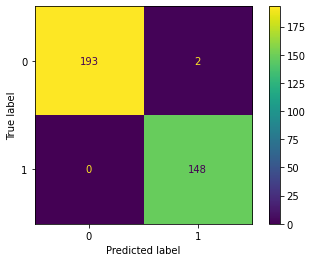

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [21]:
accuracy_score(y_test, y_pred)

0.9941690962099126

In [22]:
clf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855),
 DecisionTreeClassifier(max_features='auto', random_state=1819583497),
 DecisionTreeClassifier(max_features='auto', random_state=530702035)]

In [24]:
clf.estimators_[4]

DecisionTreeClassifier(max_features='auto', random_state=441365315)

### Plot single tree

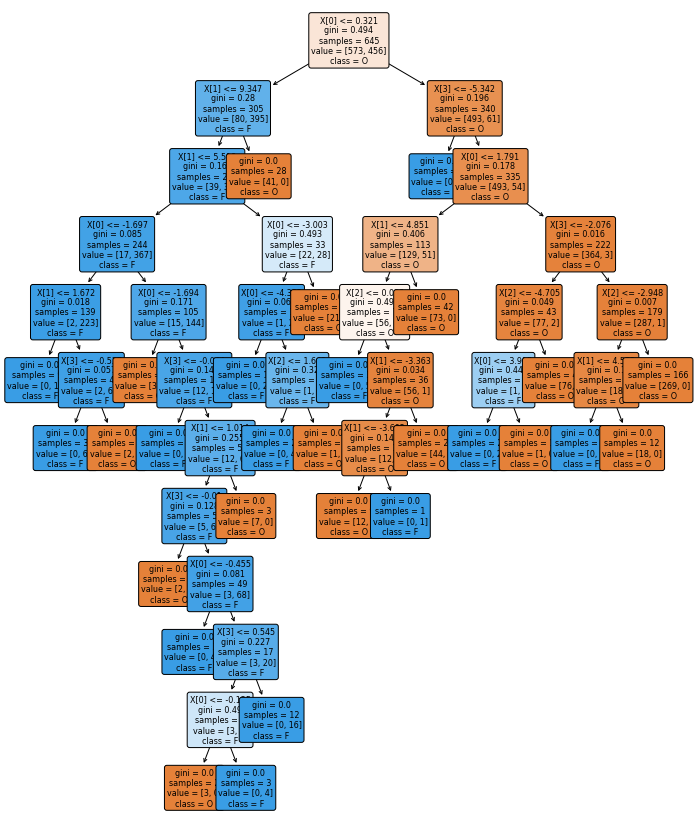

In [29]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,15))
plot_tree(clf.estimators_[3], fontsize=8, rounded=True,
         filled=True, class_names=['O','F']);